In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df['Churn'].value_counts()/len(df)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

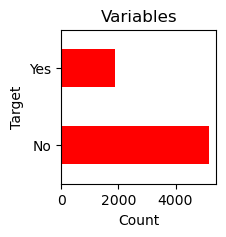

In [10]:
df['Churn'].value_counts().plot(kind='barh',color='red', figsize=(2,2))
plt.xlabel('Count')
plt.ylabel('Target')
plt.title("Variables")
plt.show()

<Axes: ylabel='Churn'>

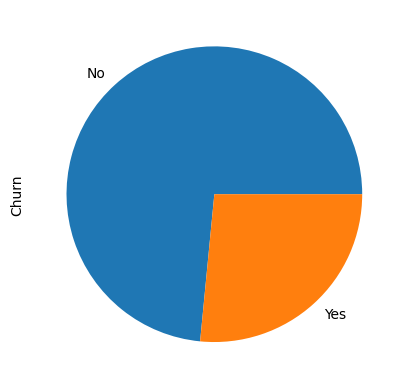

In [11]:
df['Churn'].value_counts().plot(kind='pie')

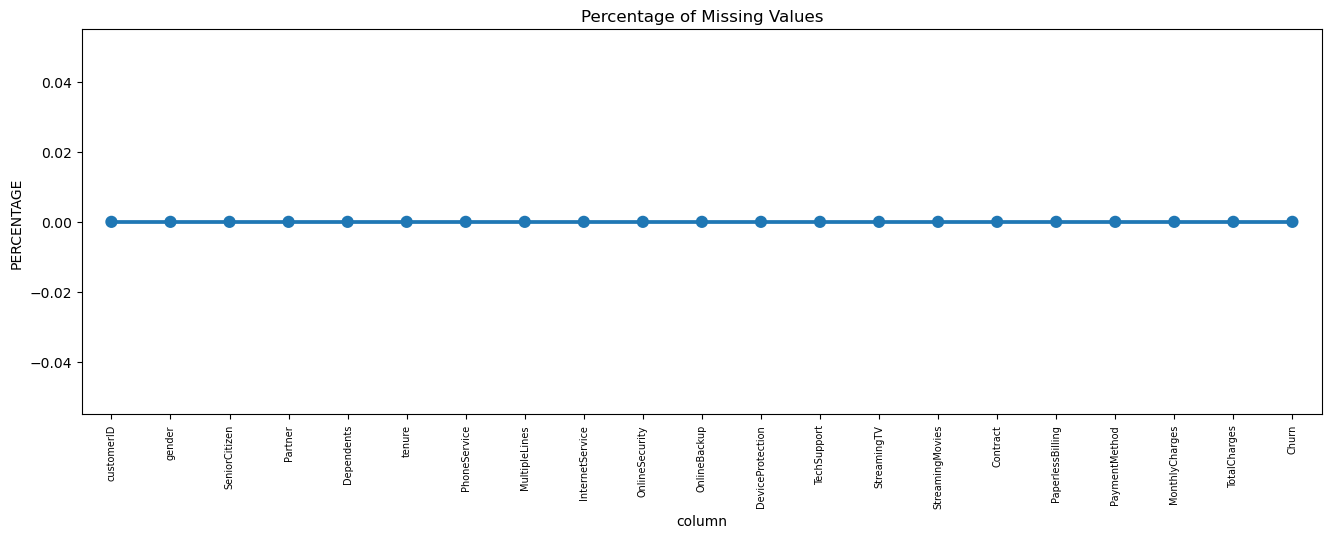

In [12]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['column', 'missing_percentage']
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column', y='missing_percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [13]:
new_df=df
#new_df = df.copy()

In [14]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')

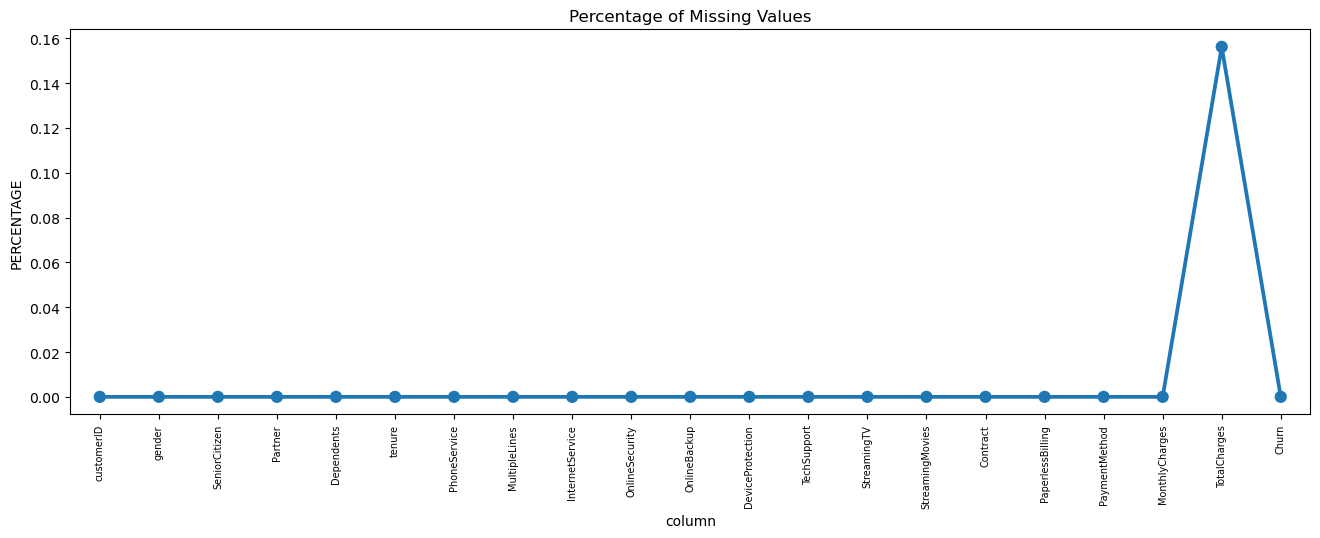

In [15]:
missing = pd.DataFrame((new_df.isnull().sum()) * 100 / new_df.shape[0]).reset_index()
missing.columns = ['column', 'missing_percentage']
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column', y='missing_percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

In [16]:
#Removing missing values
new_df.dropna(how = 'any', inplace = True)

In [17]:
# Get the max tenure
print(new_df['tenure'].max()) #72

72


In [18]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

print(labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [19]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

new_df['tenure_group'] = pd.cut(new_df.tenure, range(1, 80, 12), right=False, labels=labels)

In [20]:
new_df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [21]:
new_df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [22]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [23]:
new_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [24]:
new_df.Churn.value_counts()/len(new_df)*100

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

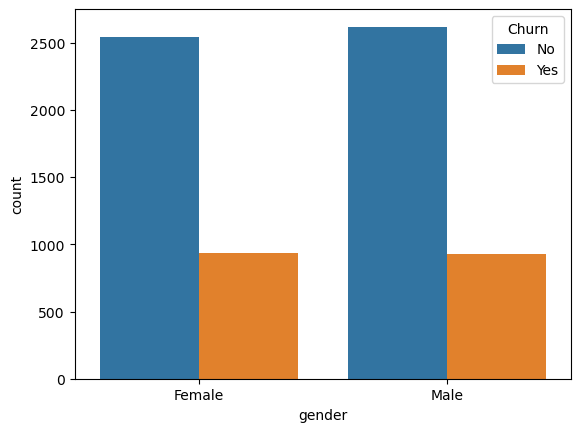

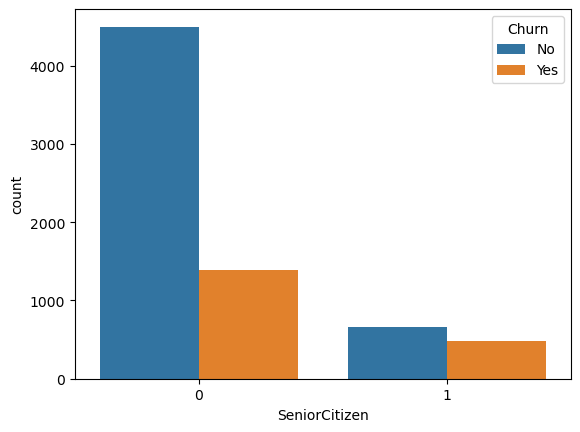

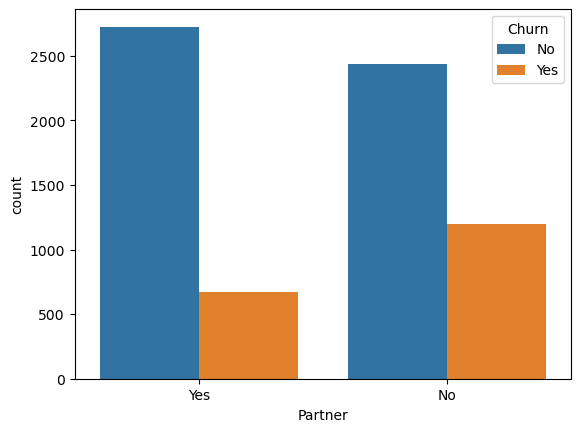

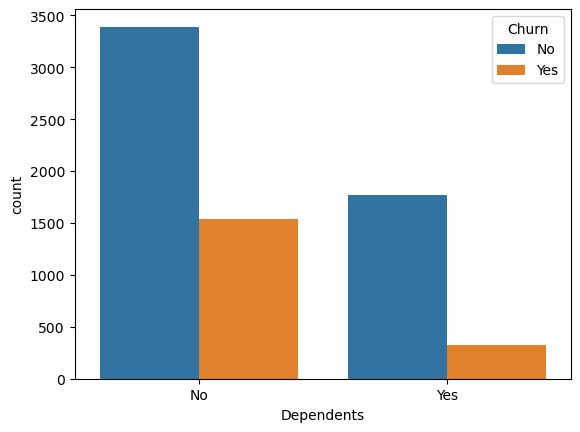

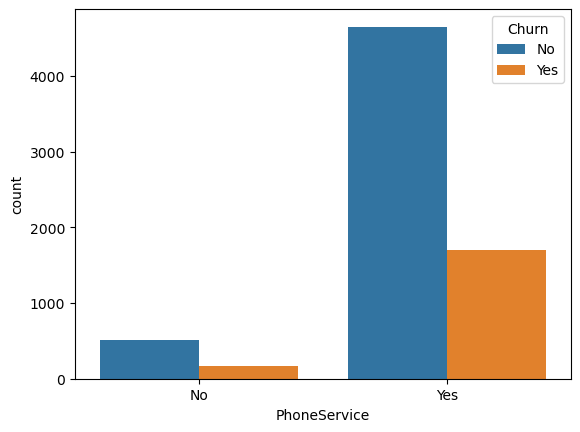

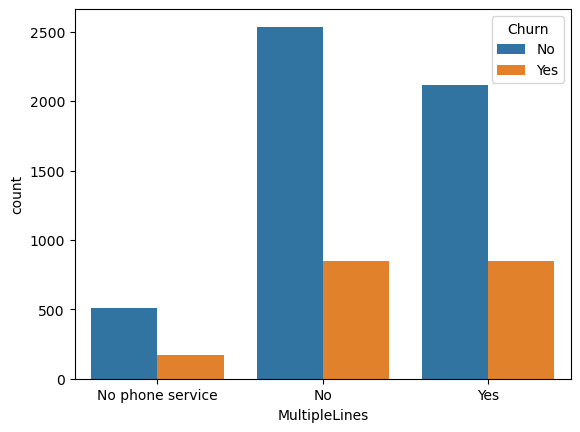

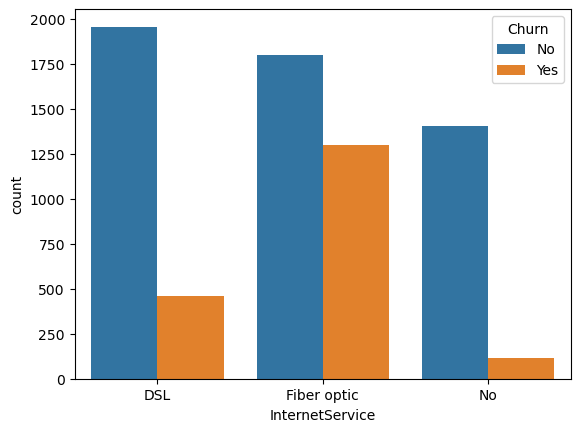

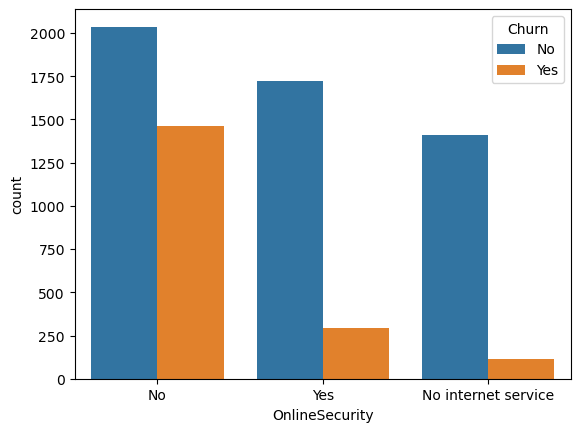

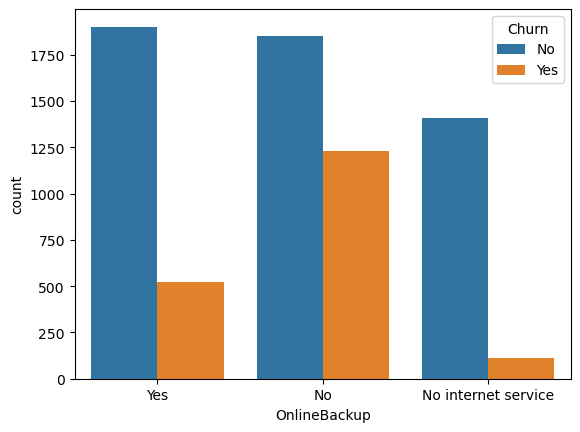

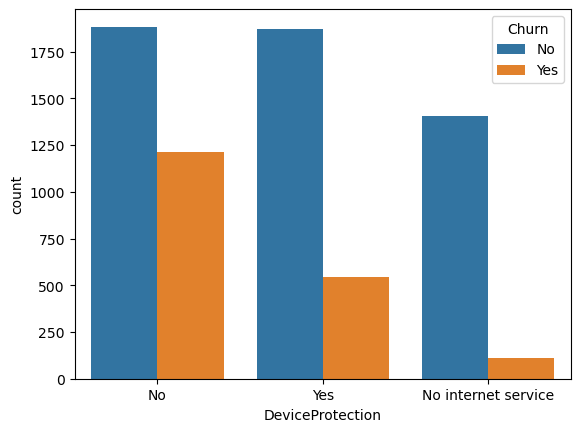

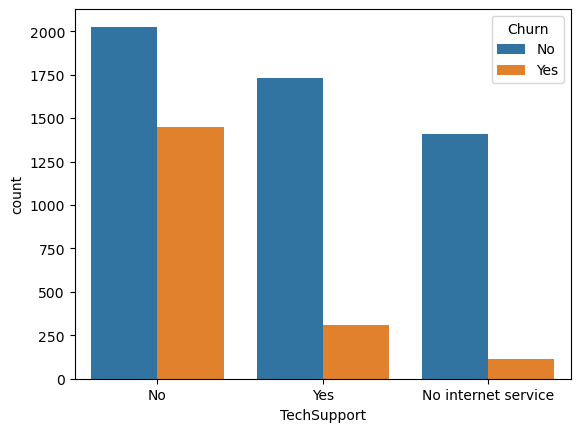

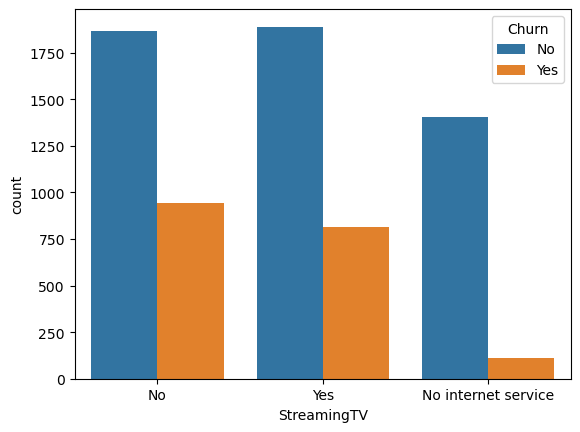

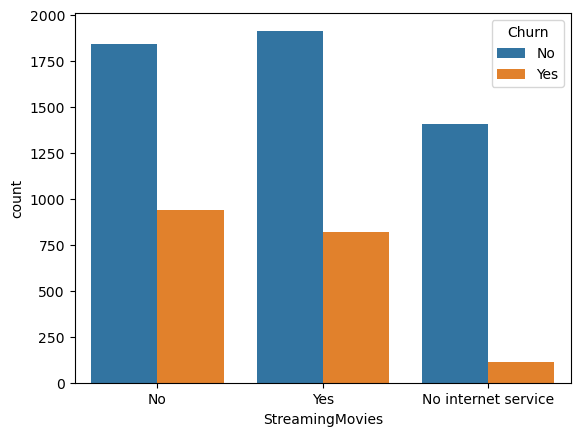

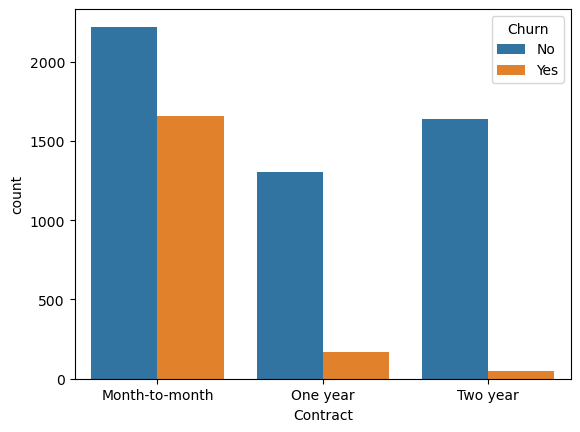

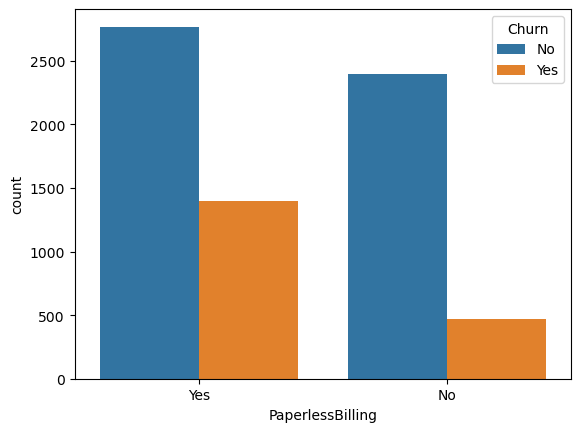

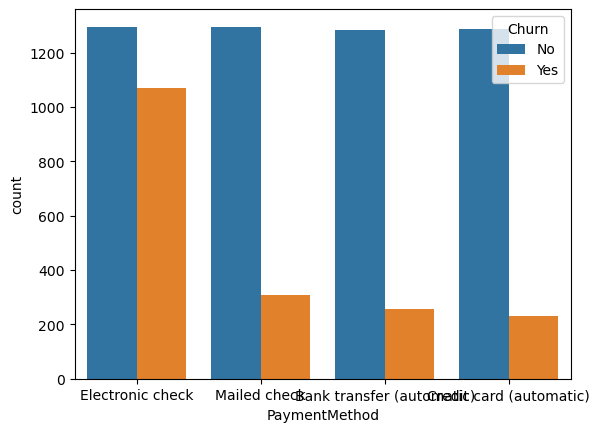

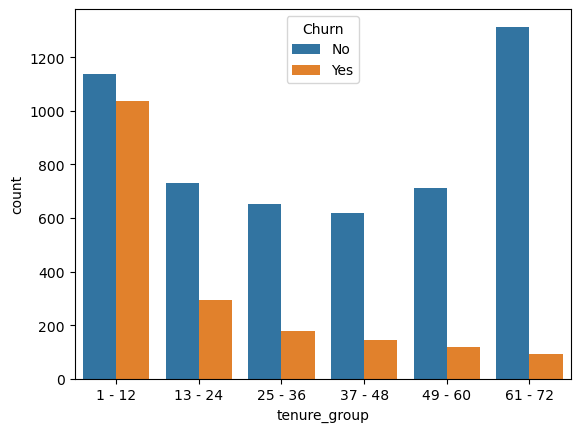

In [25]:
for i, predictor in enumerate(new_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=new_df, x=predictor, hue='Churn')

In [26]:
new_df.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [27]:
new_df1_target0=new_df[new_df["Churn"]=='No']
new_df1_target1=new_df[new_df["Churn"]=='Yes']

In [28]:
new_df1_target1.SeniorCitizen.value_counts()

0    1393
1     476
Name: SeniorCitizen, dtype: int64

In [29]:
new_df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [30]:
new_df1_target1.gender.value_counts()

Female    939
Male      930
Name: gender, dtype: int64

In [31]:
new_df.Partner.value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [32]:
new_df1_target1.Partner.value_counts()

No     1200
Yes     669
Name: Partner, dtype: int64

In [33]:
new_df.Dependents.value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [34]:
new_df1_target1.Dependents.value_counts()

No     1543
Yes     326
Name: Dependents, dtype: int64

In [35]:
new_df.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [36]:
new_df1_target1.PhoneService.value_counts()

Yes    1699
No      170
Name: PhoneService, dtype: int64

In [37]:
new_df.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [38]:
new_df1_target1.MultipleLines.value_counts()

Yes                 850
No                  849
No phone service    170
Name: MultipleLines, dtype: int64

In [39]:
new_df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [40]:
new_df1_target1.InternetService.value_counts()

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64

In [41]:
new_df.OnlineSecurity.value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [42]:
new_df1_target1.OnlineSecurity.value_counts()

No                     1461
Yes                     295
No internet service     113
Name: OnlineSecurity, dtype: int64

In [43]:
new_df.OnlineBackup.value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [44]:
new_df.DeviceProtection.value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [45]:
new_df1_target1.DeviceProtection.value_counts()

No                     1211
Yes                     545
No internet service     113
Name: DeviceProtection, dtype: int64

In [46]:
new_df.TechSupport.value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [47]:
new_df1_target1.TechSupport.value_counts()

No                     1446
Yes                     310
No internet service     113
Name: TechSupport, dtype: int64

In [48]:
new_df.StreamingTV.value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [49]:
new_df1_target1.StreamingTV.value_counts()

No                     942
Yes                    814
No internet service    113
Name: StreamingTV, dtype: int64

In [50]:
new_df.StreamingMovies.value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [51]:
new_df1_target1.StreamingMovies.value_counts()

No                     938
Yes                    818
No internet service    113
Name: StreamingMovies, dtype: int64

In [52]:
new_df. Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [53]:
new_df1_target1.Contract.value_counts()

Month-to-month    1655
One year           166
Two year            48
Name: Contract, dtype: int64

In [54]:
new_df.PaperlessBilling.value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [55]:
new_df1_target1.PaperlessBilling.value_counts()

Yes    1400
No      469
Name: PaperlessBilling, dtype: int64

In [56]:
new_df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [57]:
new_df1_target1.PaymentMethod.value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

In [58]:
new_df.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [59]:
new_df1_target1.tenure_group.value_counts()

1 - 12     1037
13 - 24     294
25 - 36     180
37 - 48     145
49 - 60     120
61 - 72      93
Name: tenure_group, dtype: int64

In [60]:
pd.crosstab(new_df.PaymentMethod, new_df.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


# Univariate Analysis

- Senior citizens are more likekly to churn 

0: 1393/5890 x 100 = 23.6%

1: 476/1142 x 100 = 41.6% 

[Churn rate is 41.6%]

- Gender does not appear to have a significant influence on turnover in the univariate analysis, as both males and females had identical churn rates (26%)

Female: 939/3549 x 100 = 26.4%

Male: 476/1142 x 100 = 26.2%

[Churn rate is equal

- Customers who do not have a partner are more likely to churn 

No: 1200/3639 x 100 = 32.9%

Yes: 669/3393 x 100 = 19.7%

[Churn rate is 32.9%]

- Customers with no dependents are more likely to churn. than those with dependents.

No:  1543/4933 x 100 = 31.2%

Yes: 346/2099 x 100 = 16.4%

[Churn rate is 31.2%]

- In univariate study, the PhoneService appears to have little influence on churning because both customers with and without phone service had nearly identical churn rates of 25-26%.

Yes: 170/6352 x 100 = 26.7%

No: 1699/6352 x 100 = 25%

[Churn rate is equal

- Churn is somewhat higher  for customers with several lines compared to consumers with a single line or no phone service, but the difference is minor.

Yes: 850/2967 x 100 = 28.6%

No: 849/3385 x 100 = 25%

[Churn rate is equal]

- Customers who do not have internet access are less likely to churn, whereas those who do have internet service are more likely to churn.

Fiber Optic: 1297/3096 x 100 = 41.8%

DSL: 459/2416 x 100 = 18.9%

No: 113/1520 x 100 = 7.4%

[Churn rate is 41.8%]

- In the lack of online security, consumers are more inclined to churn.

No: 1461/3497 x 100 = 41.7%

Yes: 295/2015 x 100 = 14.6%

[Churn rate is 41.7%]

- Users are more likely to churn if Online Backup is unavailable.

No: 1233/3087 x 100 = 39.9%

Yes: 523/2425 x 100 = 21.5%

[Churn rate is 39.9%]

- Users are more prone to churn in the absence of Device protection.

No: 1211/3094 x 100 = 39.1%

Yes: 545/2418 x 100 = 18.1%

[Churn rate is 39.1%]

- Churns are more prone to occur in the absence of tech support.

No: 1446/3472 x 100 = 41.6%

Yes: 310/2040 x 100 = 18.1%

[Churn rate is 41.6%]

- Customers with and without Streaming TV are more likely to churn, with a somewhat greater churn rate in the absence of Streaming TV.

No: 942/2809 x 100 = 33.5%

Yes: 814/2703 x 100 = 30.1%

[Churn rate is 33.5%]

- Customers with and without Streaming Movies are more likely to churn, with a somewhat higher churn rate in the absence of Streaming Movies.

No: 938/2781 x 100 = 33.7%

Yes: 818/2731 x 100 = 29.9%

[Churn rate is 33.1%]

- Month-to-month contracts are more likely to be terminated.

Month-to-Month: 1655/3875 = 42.7%

Two years: 166/1685 x 100 = 9.8%

One year: 48/1472 x 100 = 3.2%

[Churn rate is 42.7%]

- Paperless billing is more likely to result in churn.

Yes: 1400/4168 x 100 = 32.5%

No: 469/2864 x 100 = 16.3%

[Churn rate is 32.5%]

- Electronic check payment method users are more prone to churn.

Electric check: 1071/2365 x 100 = 45.2%

Mailed Check: 308/1604 x 100 = 19.2%

Bank transfer (auto): 258/1542 x 100 = 16.7%

Credit card (auto): 232/1521 x 100 = 15.2%

[Churn rate is 45.2%]

- Those with a tenure of 1-12 months are more prone to turnover.

1 - 12 : 1037/2175 x 100 = 47.6%

12 - 24 : 294/1407 x 100 = 20.8%

25 - 31 : 180/1024 x 100 = 17.5%

32 - 48 : 145/832 x 100 = 17.4%

49 - 60 : 120/832 x 100 = 14.4%

61 - 72 : 93/762 x 100 = 12.2%

[Churn rate is 47.6%]






# Univariante Insights [TO DO]

Senior citizens are more likely to Churn

Monthly customers are more likely to Churn


In [61]:
# Converting 'Churn' to numeric
new_df['Churn'] = np.where(new_df.Churn == 'Yes',1,0)

In [62]:
new_df.head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [63]:
# for machine leaning (predictive Modelling), we need to perform feature encoding
new_df_dummies = pd.get_dummies(new_df)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


# Relationship between Monthly Charges and Total Charges

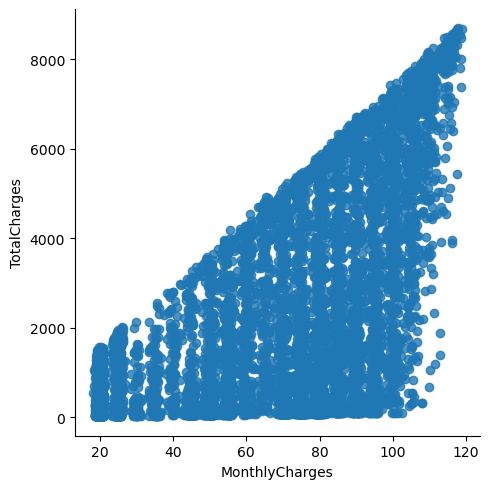

In [64]:
sns.lmplot(data=new_df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)


In [65]:
new_df_dummies['MonthlyCharges'].corr(new_df_dummies['TotalCharges'])

0.6510648032262025

Total charges increases as monthly charges increases

# Churn by Monthly Charges and Total Charges

In [ ]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

/var/folders/r8/q_j6zg715xggnn2kzprzknnm0000gn/T/ipykernel_2139/3436189338.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 0) ],
/var/folders/r8/q_j6zg715xggnn2kzprzknnm0000gn/T/ipykernel_2139/3436189338.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[(new_df_dummies["Churn"] == 1) ],


# Insight: Churn is high when Monthly Charges ar high

In [ ]:
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(new_df_dummies.TotalCharges[(new_df_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')
     

Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

# Build a corelation of all predictors with 'Churn'


In [ ]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
plt.figure(figsize=(20,8))
new_df_dummies.corr()['Churn'].sort_values(ascending = False)

# Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

This is also evident from the Heatmap below

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(new_df_dummies.corr(), cmap="Paired")

# Bivariate Analysis


In [ ]:
new_df1_target0=new_df.loc[new_df["Churn"]==0] #Active Customers
new_df1_target1=new_df.loc[new_df["Churn"]==1] #Churned Customers

In [ ]:
len(new_df1_target0)

In [ ]:
len(new_df1_target1)

In [93]:
def uniplot(df,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 12
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.titlepad'] = 20


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')

     

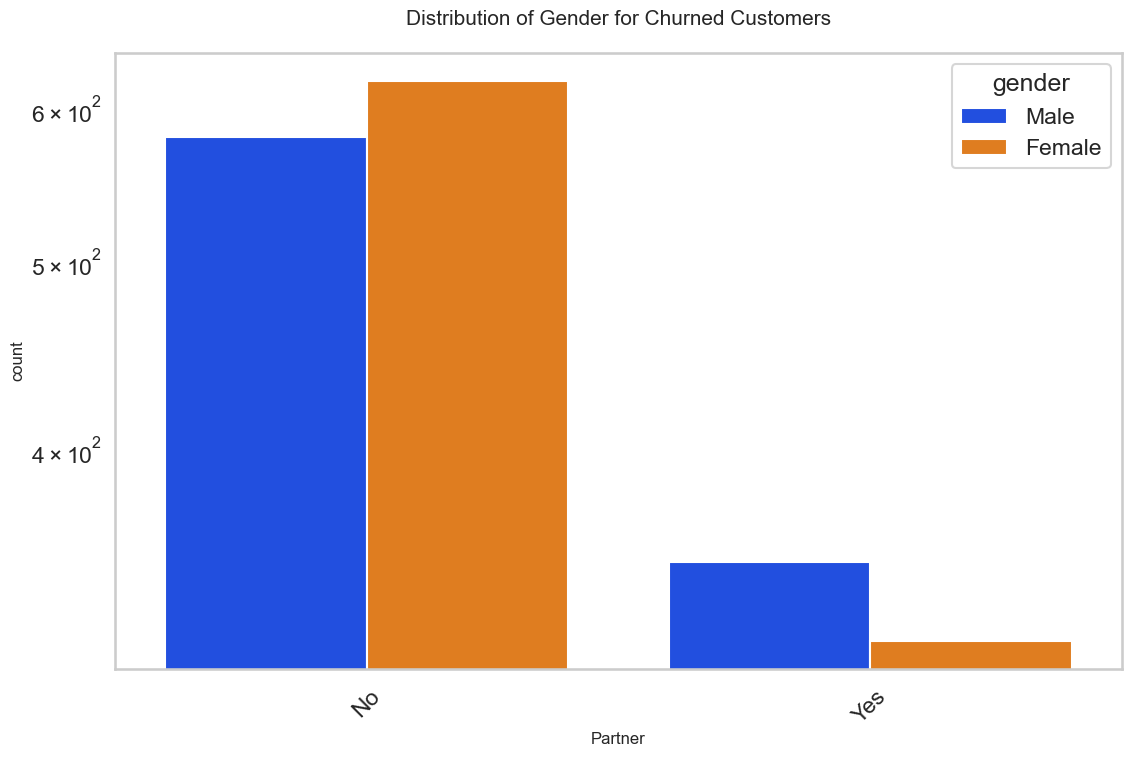

In [94]:
uniplot(new_df1_target1, col='Partner', title= 'Distribution of Gender for Churned Customers', hue='gender')

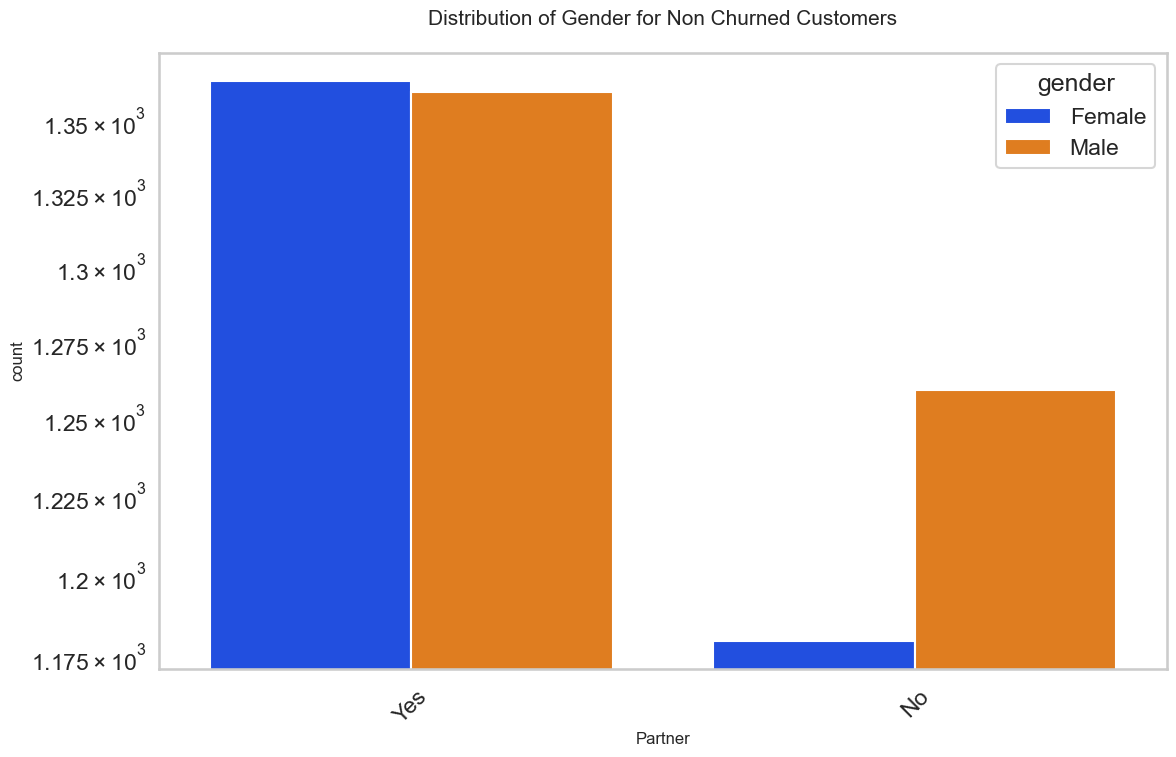

In [95]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

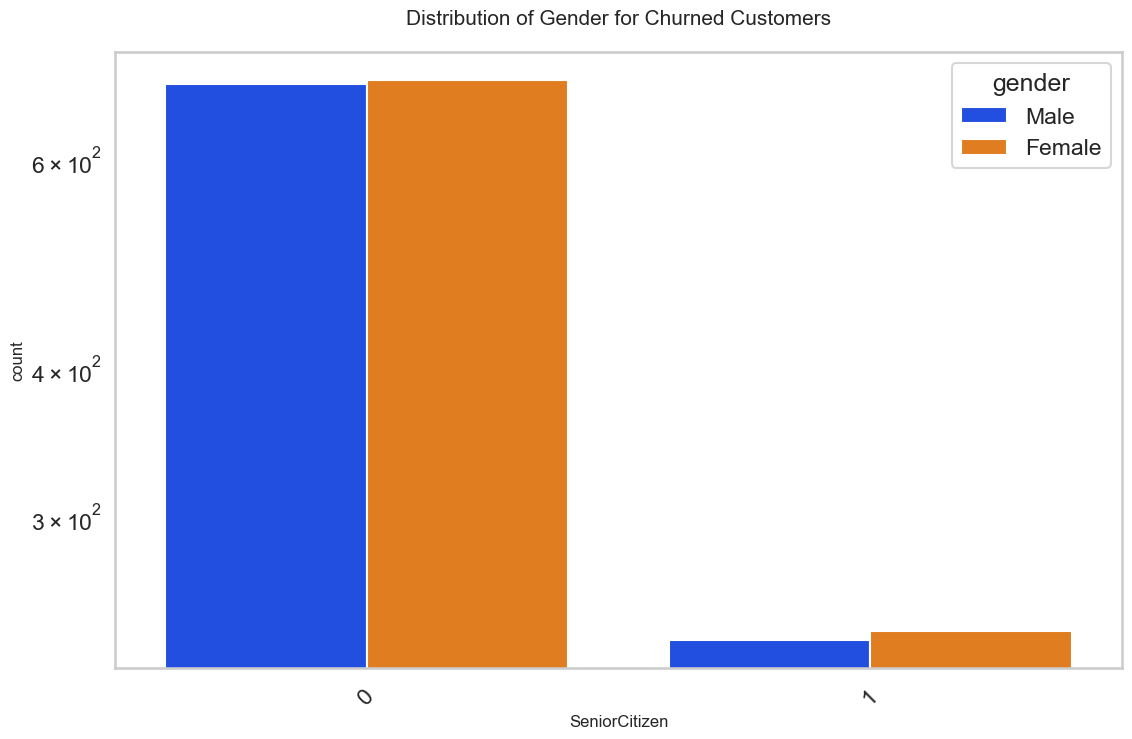

In [96]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of Gender for Churned Customers',hue='gender')

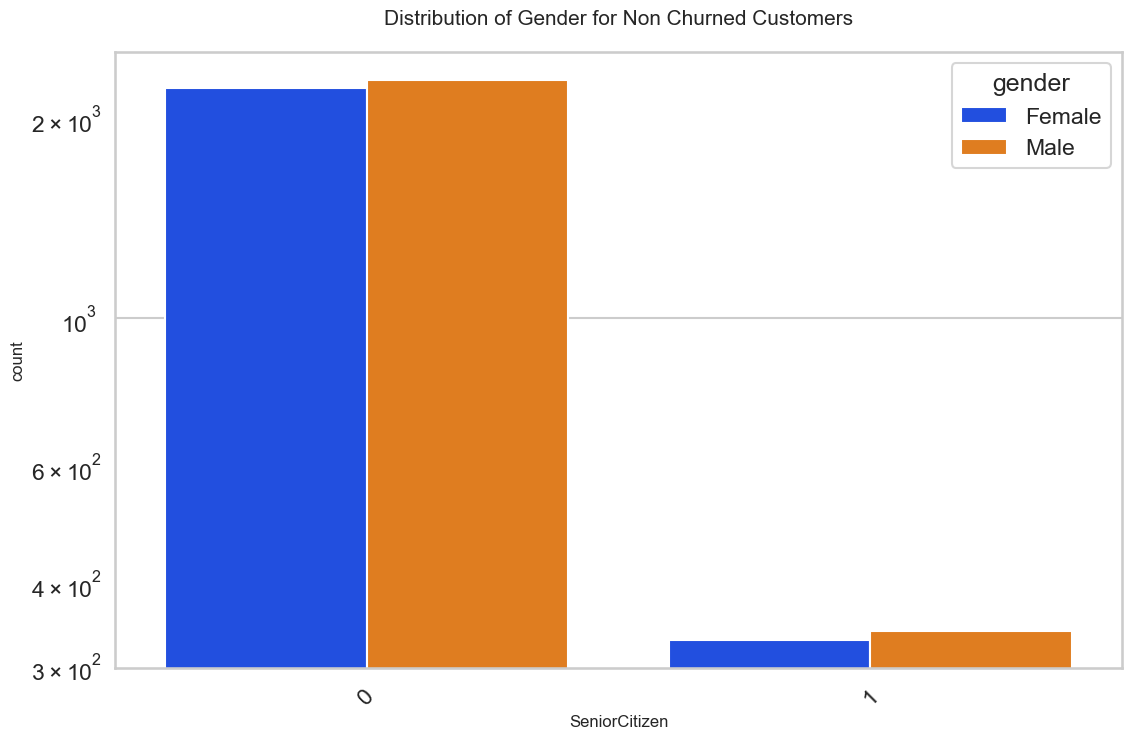

In [97]:
uniplot(new_df1_target0,col='SeniorCitizen',title='Distribution of Gender for Non Churned Customers',hue='gender')

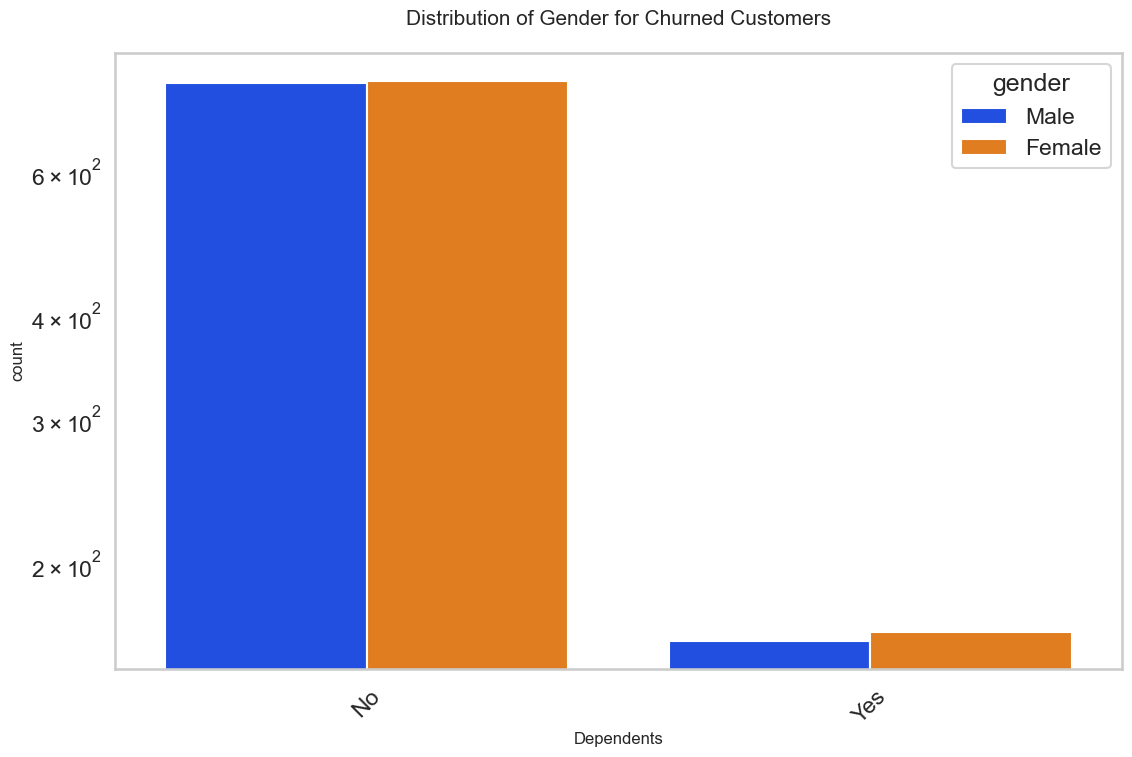

In [98]:
uniplot(new_df1_target1,col='Dependents',title='Distribution of Gender for Churned Customers',hue='gender')

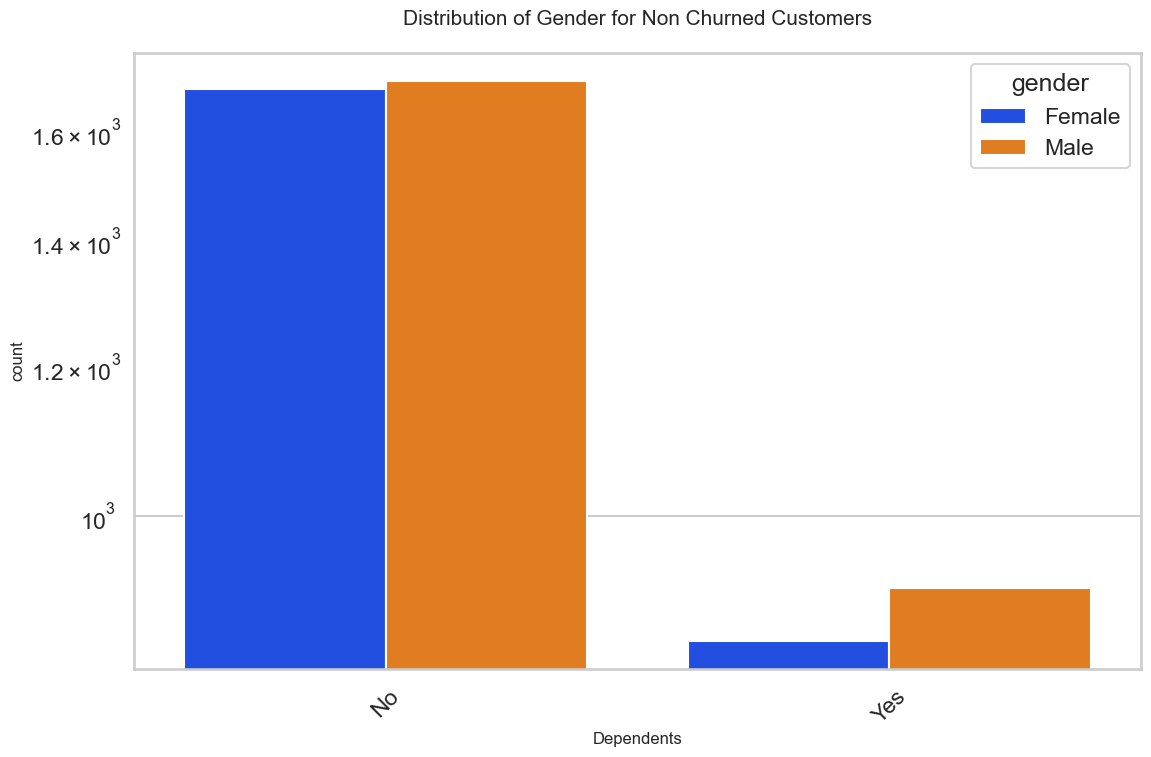

In [99]:
uniplot(new_df1_target0,col='Dependents',title='Distribution of Gender for Non Churned Customers',hue='gender')

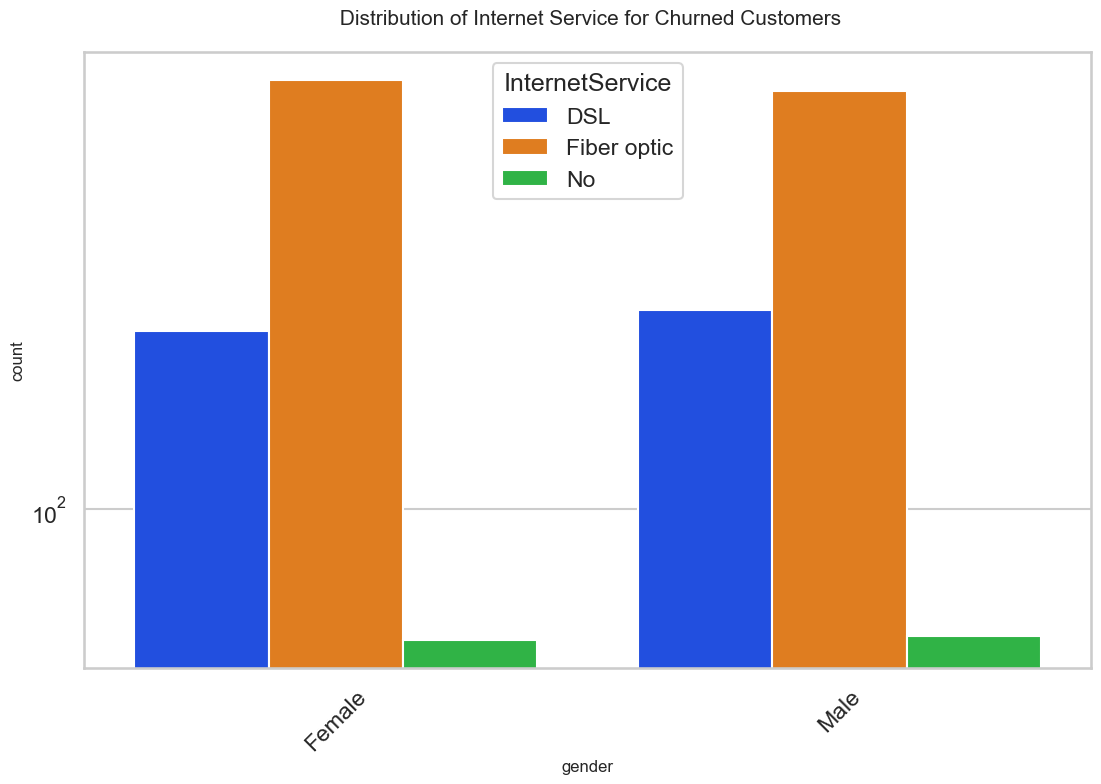

In [100]:
uniplot(new_df1_target1,col='gender',title=' Distribution of Internet Service for Churned Customers',hue='InternetService')

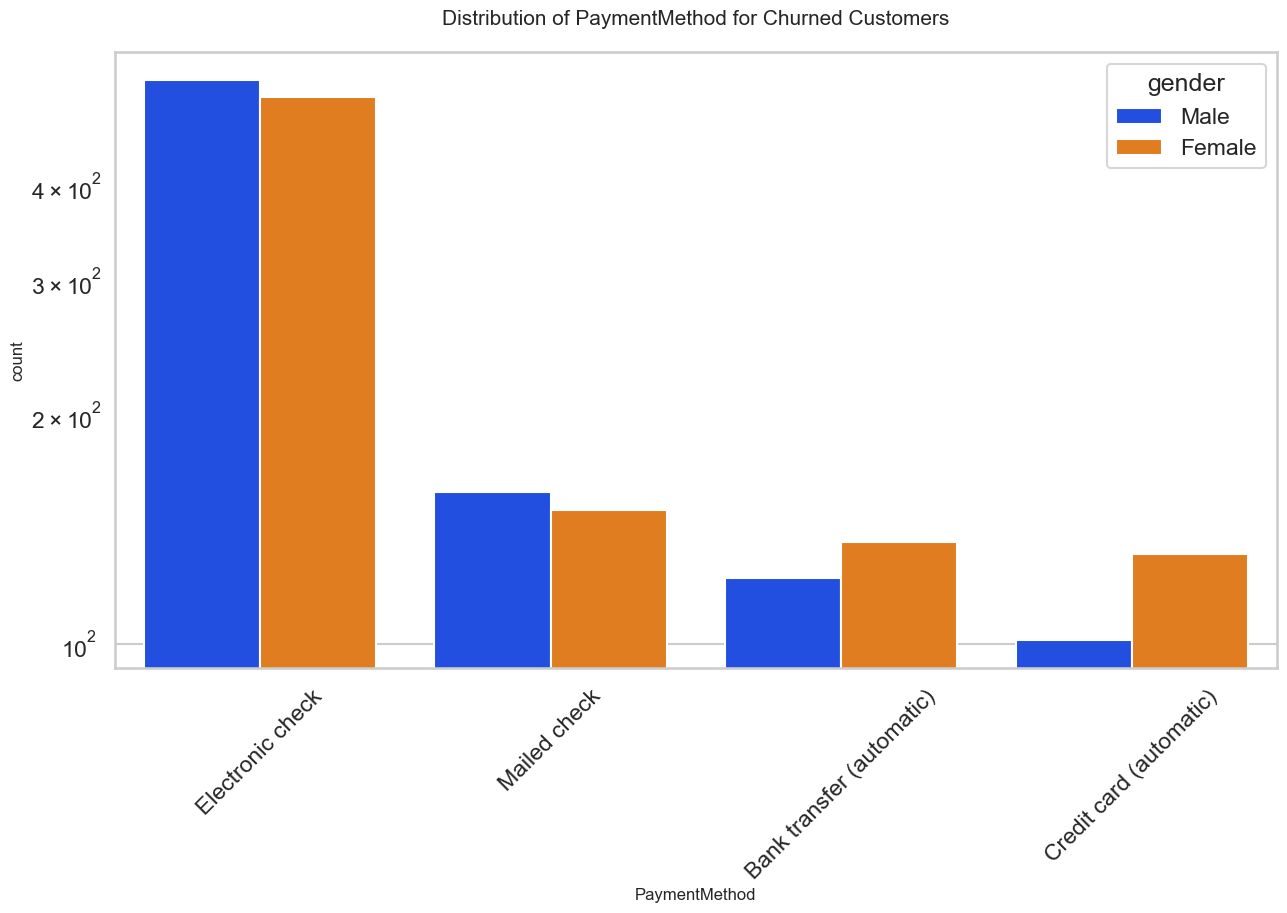

In [101]:
uniplot(new_df1_target1, col='PaymentMethod', title= 'Distribution of PaymentMethod for Churned Customers', hue='gender')

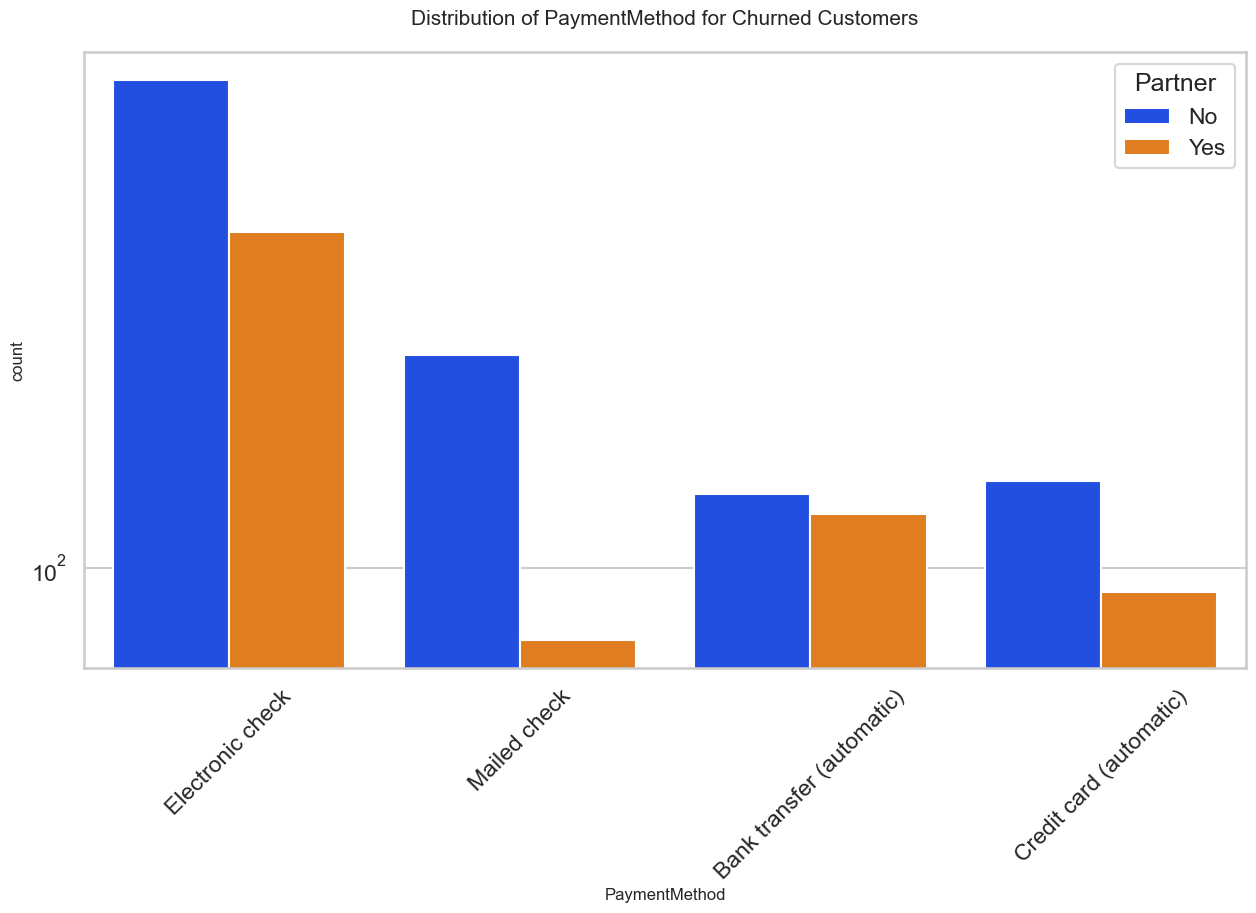

In [102]:
uniplot(new_df1_target1, col='PaymentMethod', title= 'Distribution of PaymentMethod for Churned Customers', hue='Partner')

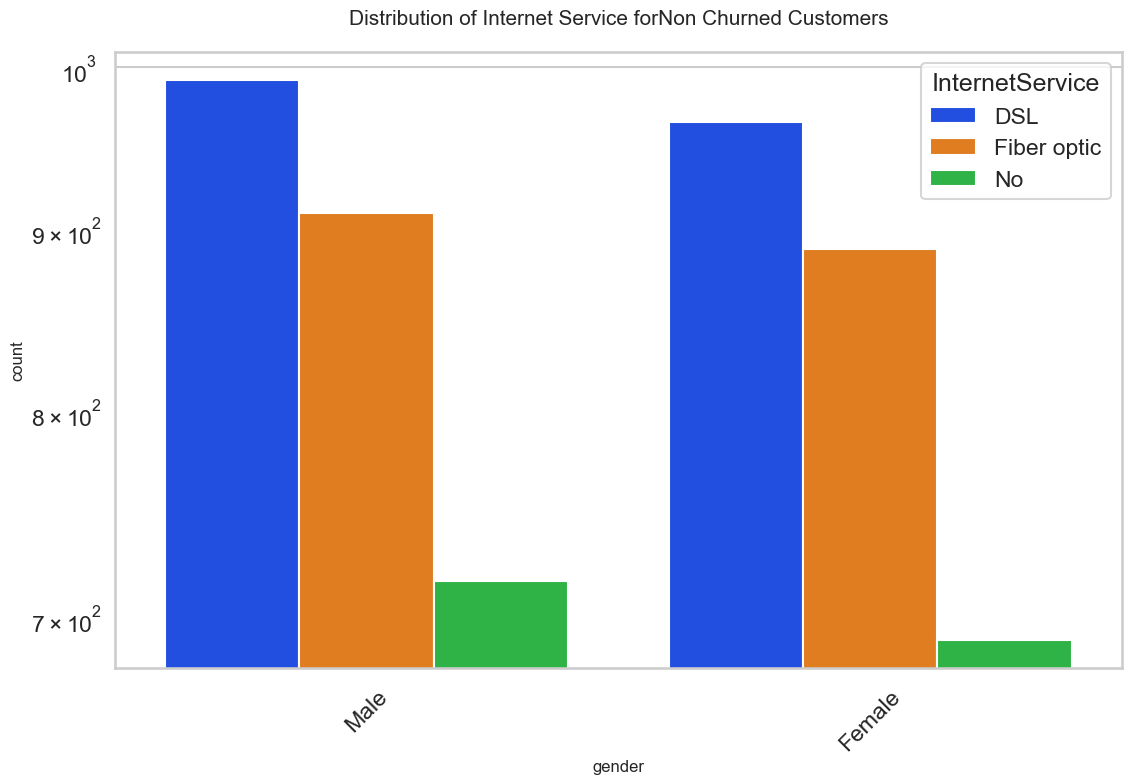

In [103]:
uniplot(new_df1_target0,col='gender',title='Distribution of Internet Service forNon Churned Customers',hue='InternetService')

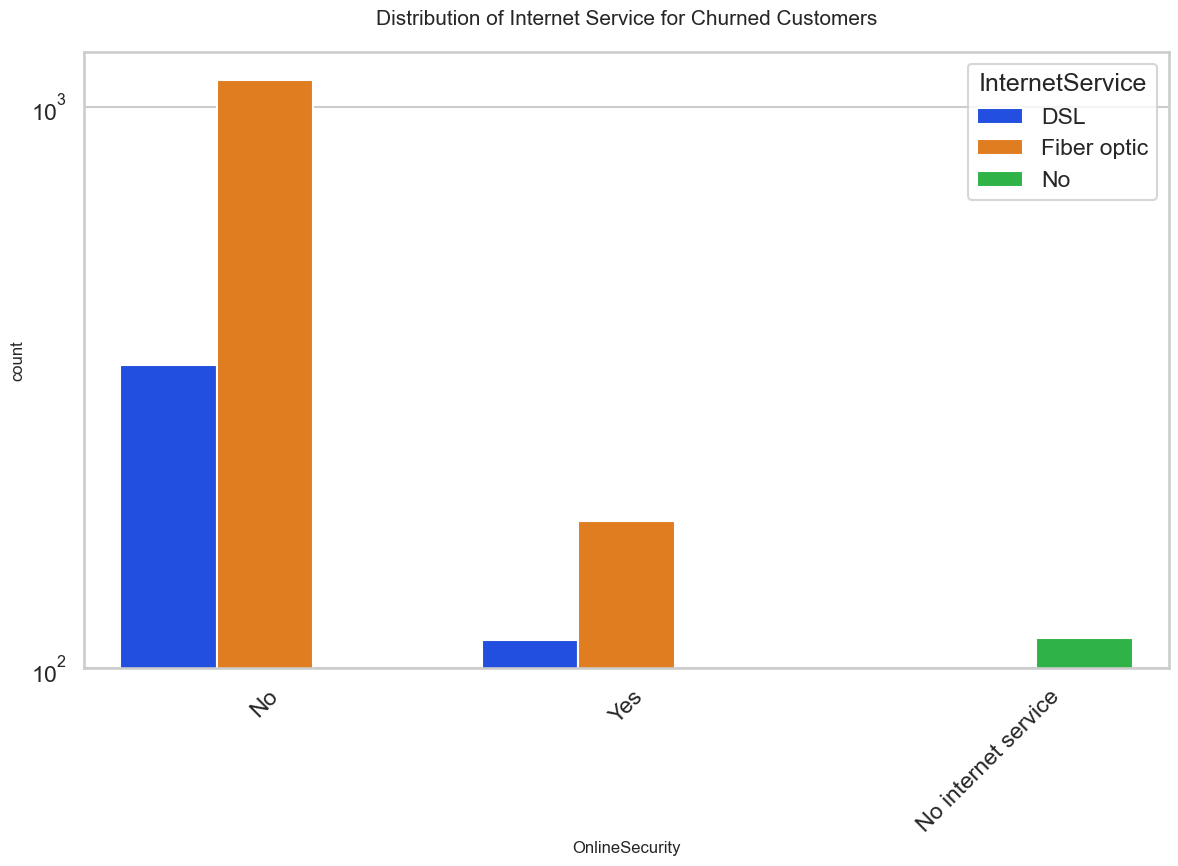

In [104]:
uniplot(new_df1_target1,col='OnlineSecurity',title='Distribution of Internet Service for Churned Customers',hue='InternetService')

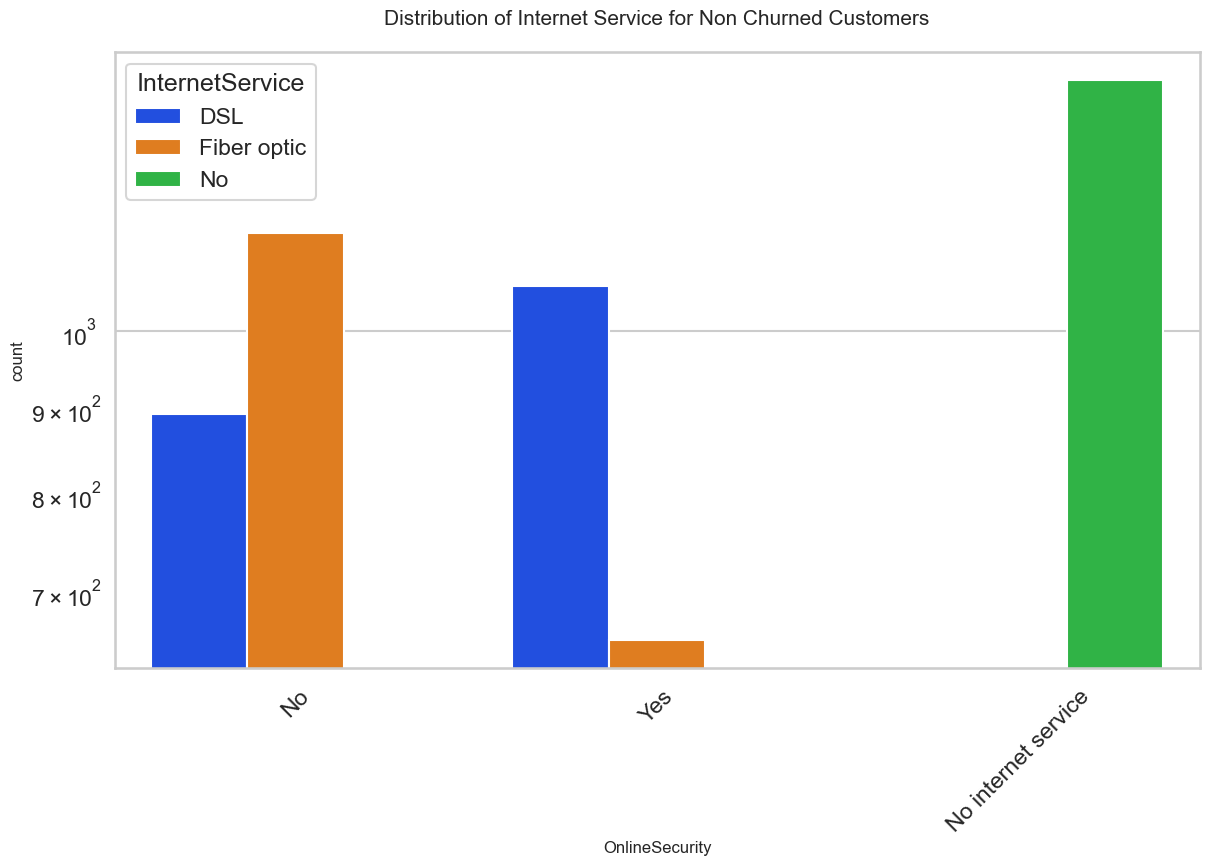

In [105]:
uniplot(new_df1_target0,col='OnlineSecurity',title='Distribution of Internet Service for Non Churned Customers',hue='InternetService')

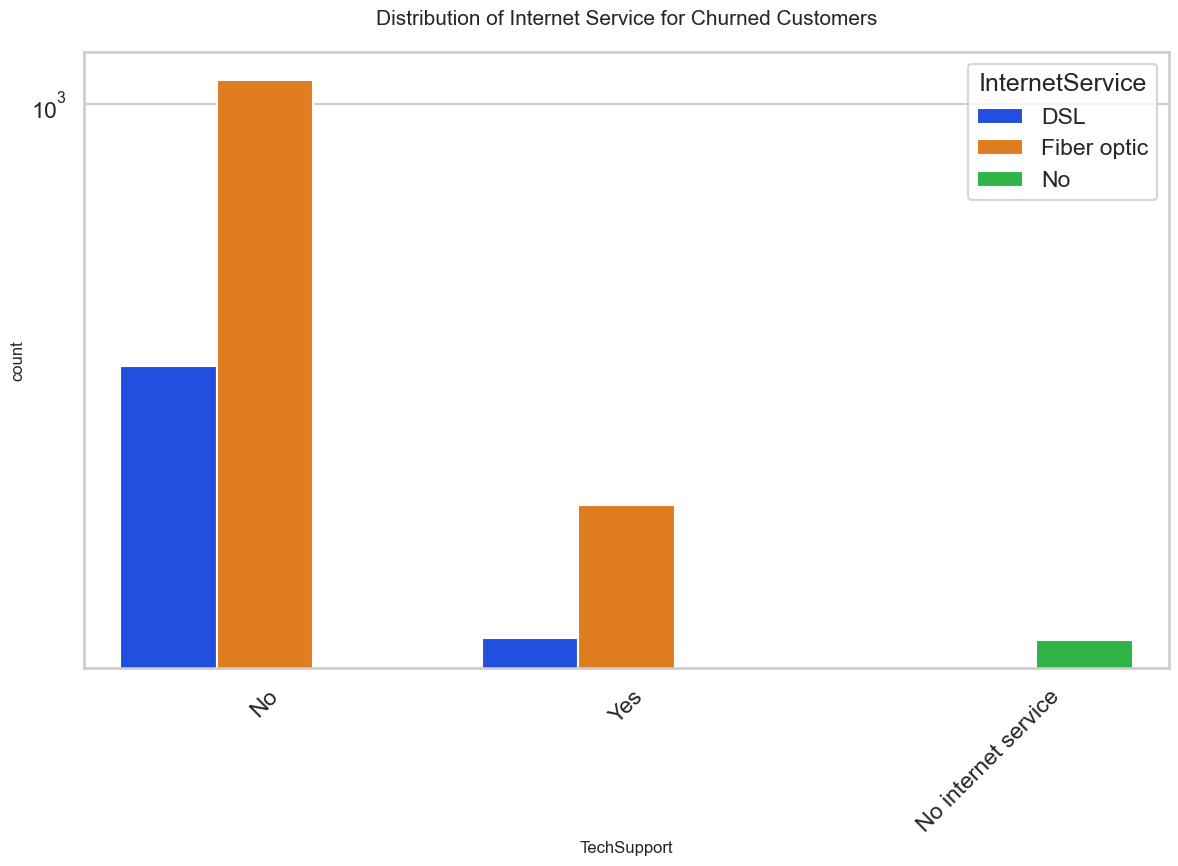

In [106]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of Internet Service for Churned Customers',hue='InternetService')

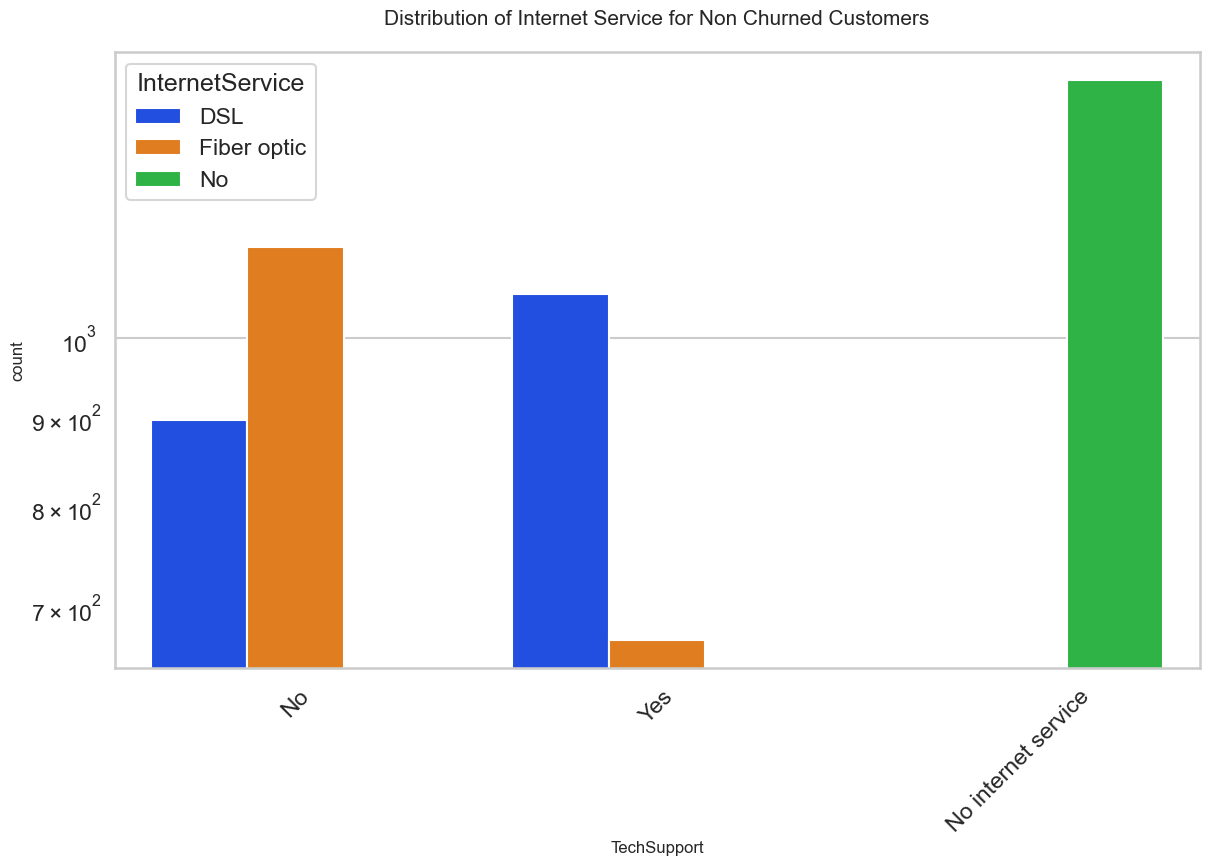

In [107]:
uniplot(new_df1_target0,col='TechSupport',title='Distribution of Internet Service for Non Churned Customers',hue='InternetService')

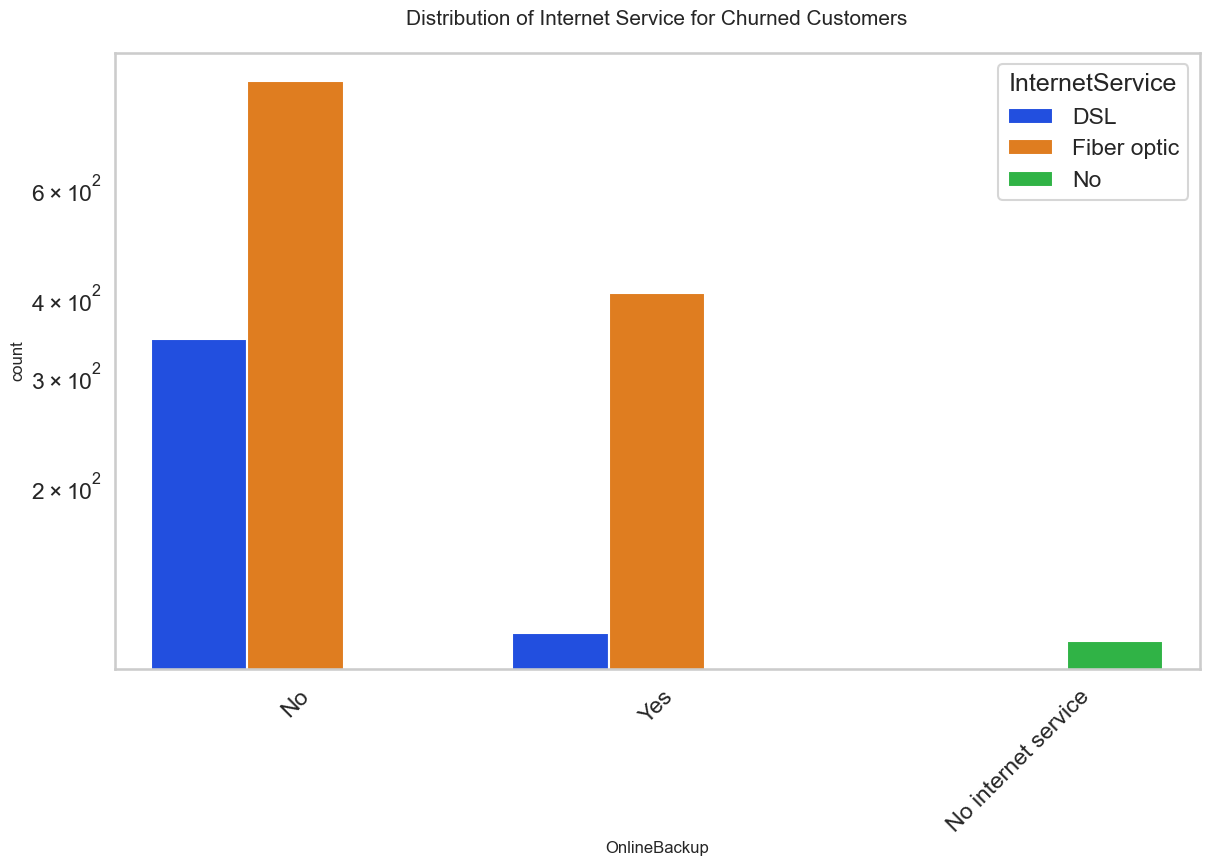

In [108]:
uniplot(new_df1_target1,col='OnlineBackup',title='Distribution of Internet Service for Churned Customers',hue='InternetService')

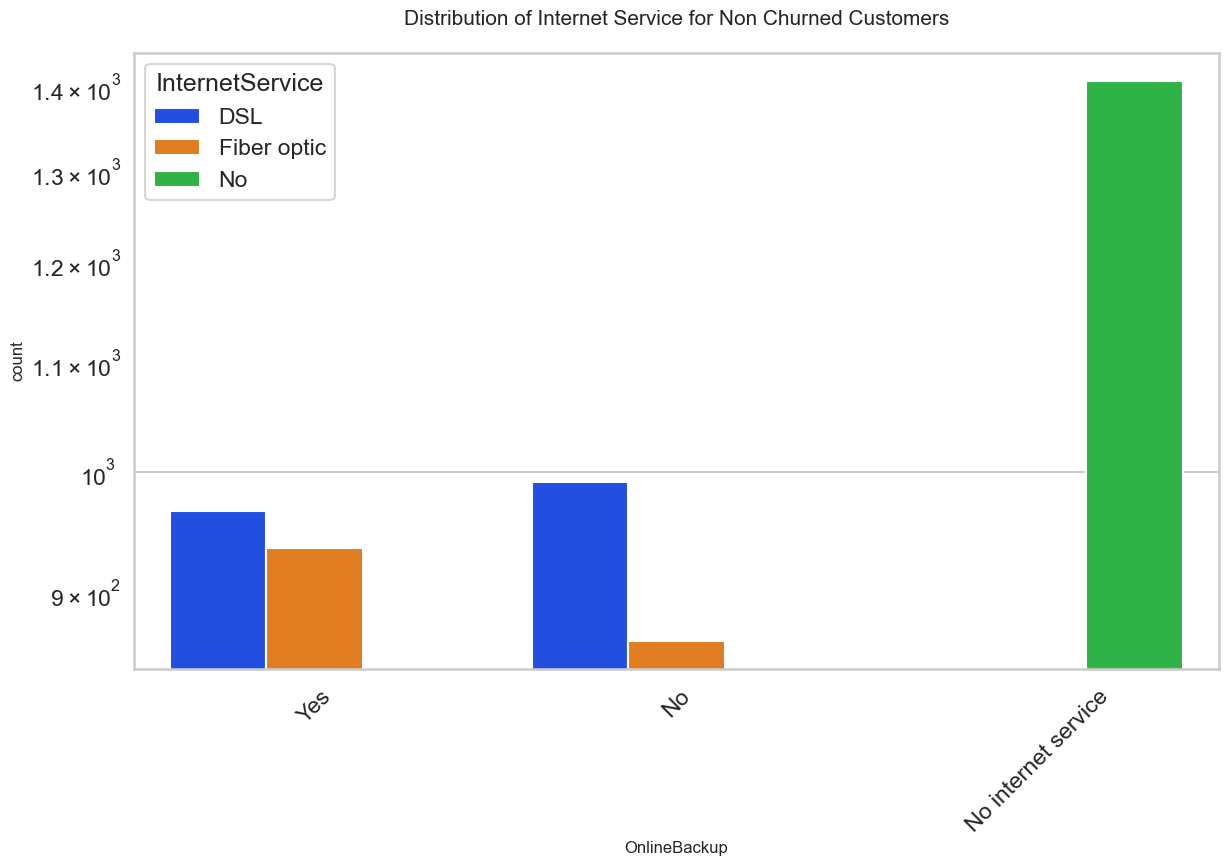

In [109]:
uniplot(new_df1_target0,col='OnlineBackup',title='Distribution of Internet Service for Non Churned Customers',hue='InternetService')

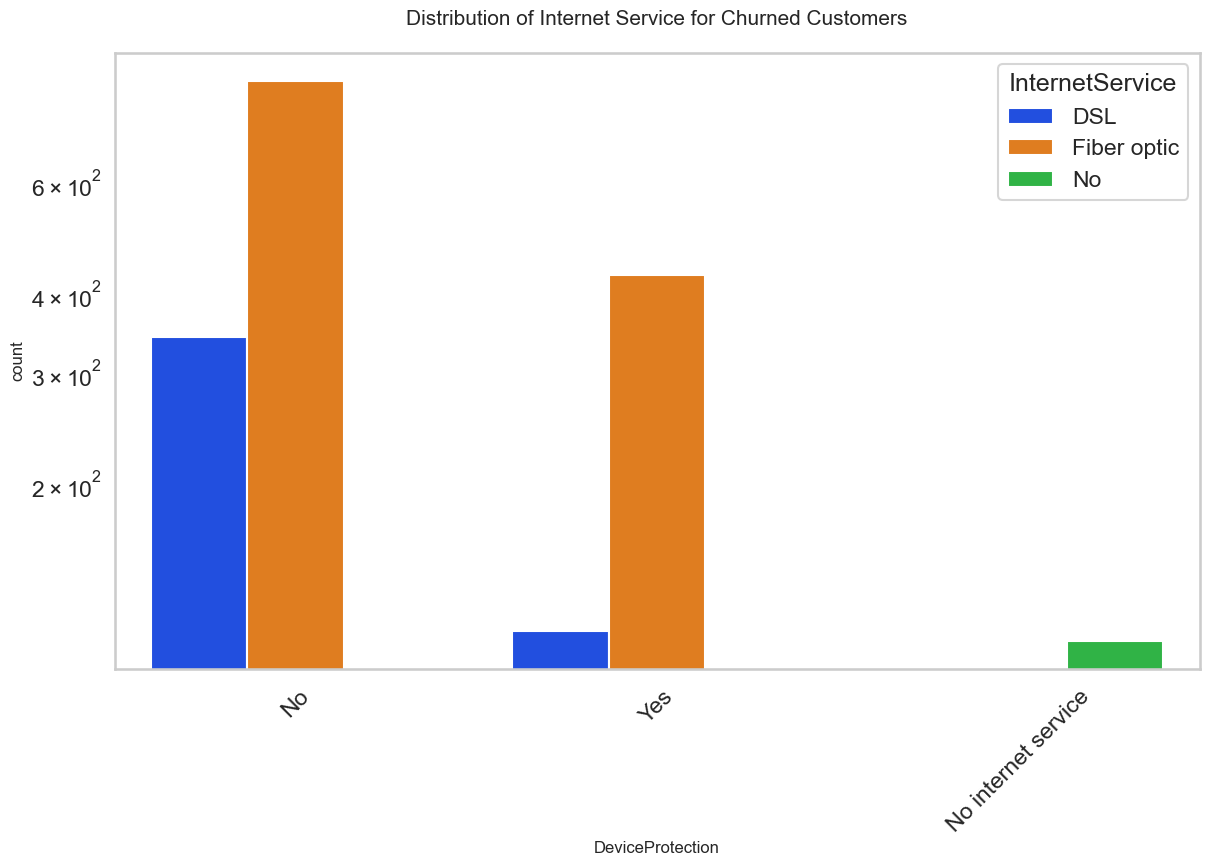

In [110]:
uniplot(new_df1_target1,col='DeviceProtection',title='Distribution of Internet Service for Churned Customers',hue='InternetService')

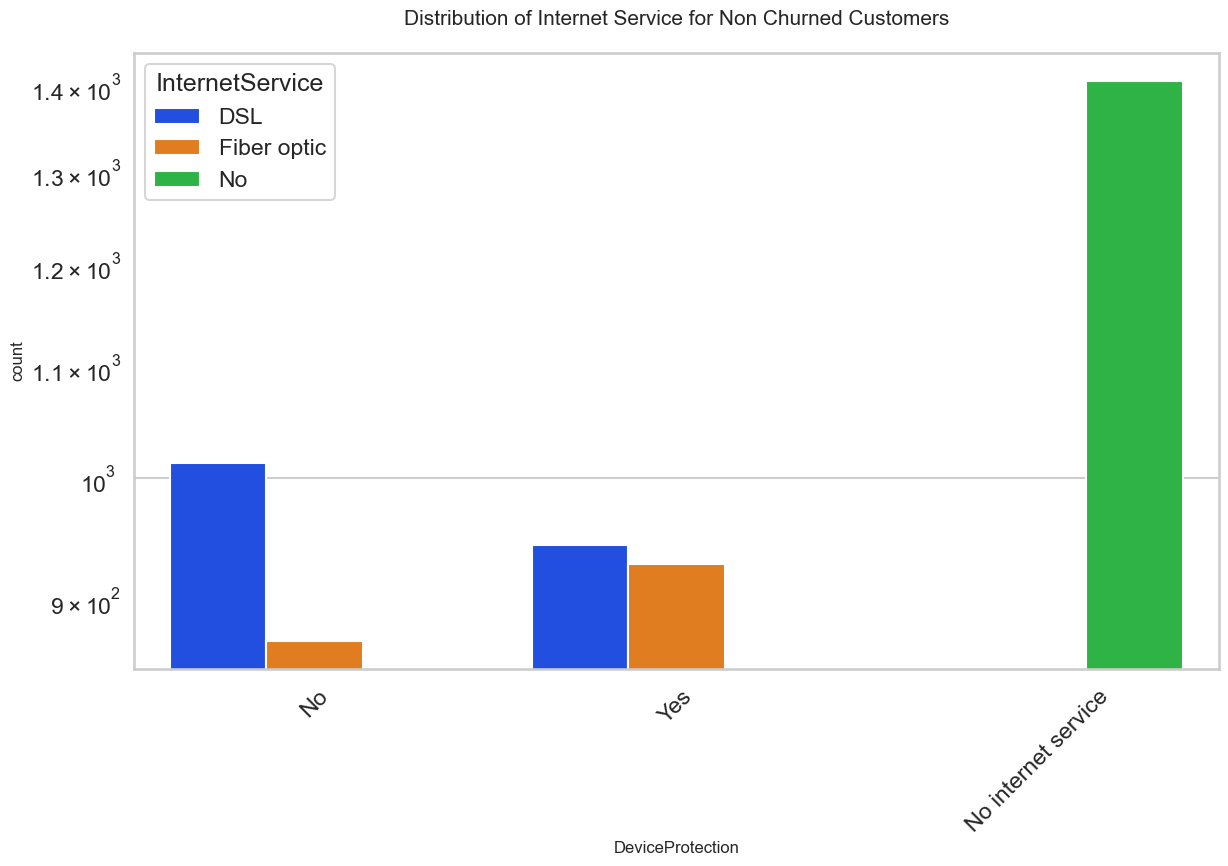

In [111]:
uniplot(new_df1_target0,col='DeviceProtection',title='Distribution of Internet Service for Non Churned Customers',hue='InternetService')

# Conclusion 

- Senior citizens have a higher turnover rate of roughly 42%.

- People on monthly contracts are the most likely to leave.

- Fiberoptic service users have a high turnover rate.

- Electronic check payments are the most popular.

- People on two-year contracts are less likely to leave.

- Males who do not have partners are more likely to churn (33%).

- Females who use credit cards for payment are more likely to churn than males.
